In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from skimage.exposure import equalize_adapthist
from skimage.exposure import rescale_intensity as rescale
from skimage.color import gray2rgb
%matplotlib inline

In [2]:
import javabridge
import bioformats
javabridge.start_vm(class_path=bioformats.JARS)

In [178]:
!ls /groups/ahrens/ahrenslab/davis/data/confocal/*/*.lsm

/groups/ahrens/ahrenslab/davis/data/confocal/20140831/GFAP(RFP_GCaMP)_HuC_GCaMP_11dpf_fore_F1.lsm
/groups/ahrens/ahrenslab/davis/data/confocal/20140831/GFAP(RFP_GCaMP)_HuC_GCaMP_11dpf_fore_F2.lsm
/groups/ahrens/ahrenslab/davis/data/confocal/20140831/GFAP(RFP_GCaMP)_HuC_GCaMP_11dpf_posthind_F2.lsm
/groups/ahrens/ahrenslab/davis/data/confocal/20140831/GFAP(RFP_GCaMP)_HuC_GCaMP_11dpf_spinal_F2.lsm
/groups/ahrens/ahrenslab/davis/data/confocal/20140907/GFAP(RFP_GCaMP)_HuC_GCaMP_3dpf_fore_F1.lsm
/groups/ahrens/ahrenslab/davis/data/confocal/20140907/GFAP(RFP_GCaMP)_HuC_GCaMP_3dpf_fore_F2.lsm
/groups/ahrens/ahrenslab/davis/data/confocal/20140907/GFAP(RFP_GCaMP)_HuC_GCaMP_3dpf_mid_F1.lsm
/groups/ahrens/ahrenslab/davis/data/confocal/20140907/GFAP(RFP_GCaMP)_HuC_GCaMP_3dpf_mid_F2.lsm
/groups/ahrens/ahrenslab/davis/data/confocal/20150401/4dpf_cy214_cy74.lsm
/groups/ahrens/ahrenslab/davis/data/confocal/20150401/4dpf_cy214_cy74_side.lsm
/groups/ahrens/ahrenslab/davis/data/confocal/20150420/gfap_gal4

In [179]:
tmp = imread('/groups/ahrens/ahrenslab/davis/data/confocal/20151012/20151012_6dpf_cy163xcy221_f1_1.lsm', plugin='tifffile')

In [182]:
tmp.shape

(1, 96, 1024, 1024, 3)

# A dorsal-ventral view

In [190]:
fname = '/groups/ahrens/ahrenslab/davis/anatomy/5dpf_cy214xcy74_f1_DV.czi'
imr = bioformats.ImageReader(fname)
exp_name = Path(fname).parts[-1].split('.')[0]

In [192]:
imz = []
for z in range(1000):
    try:
        imz.append(imr.read(z=z))
    except:
        break
imz = np.array(imz)

In [193]:
imz.shape

(178, 1024, 1024, 2)

/groups/ahrens/home/bennettd/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


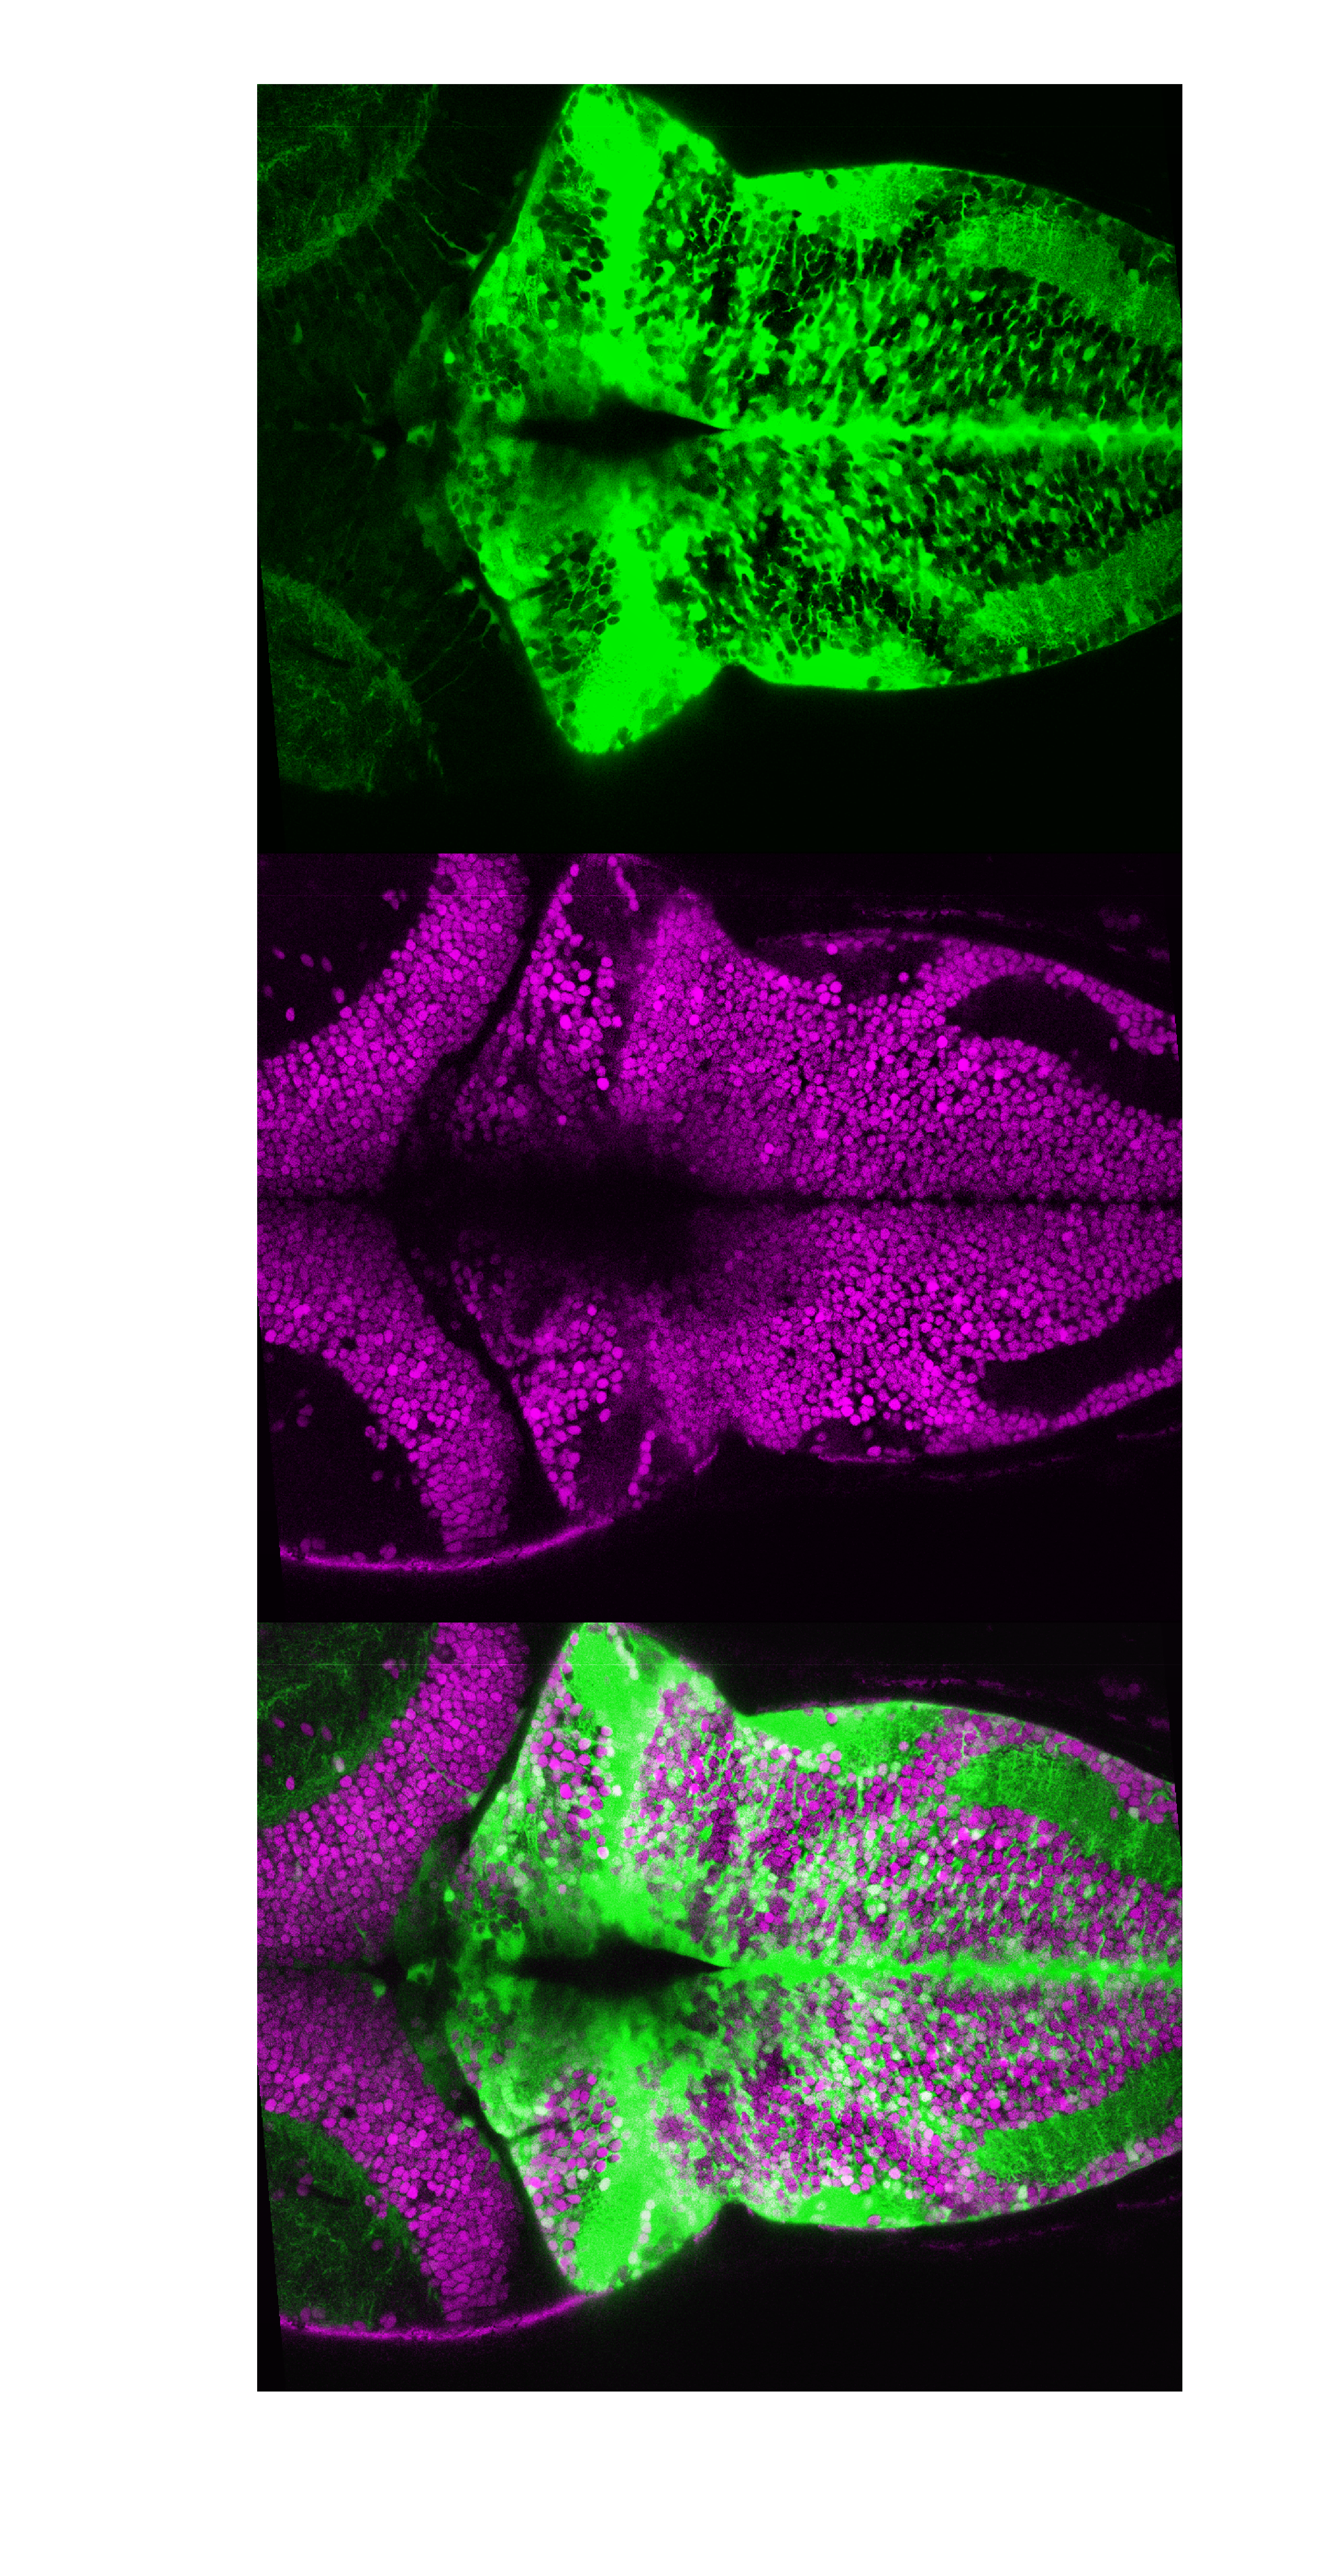

In [194]:
fig, axs = plt.subplots(dpi=1500, nrows=3, figsize=(8.5 /2, 11/2))
z = (70, 71)
crop = (slice(*z), slice(180,-90), slice(50,-50))
plane = rotate(imz[crop[0]].max(0).astype('float32'), angle=5 + 180)[crop[1:]]
g = gray2rgb(equalize_adapthist(rescale(plane[:,:,1], out_range=(0,1)), nbins=256)) * np.array([0,1,0])
n = gray2rgb(equalize_adapthist(rescale(plane[:,:,0], out_range=(0,1)), nbins=256)) * np.array([1,0,1])
gamma = (1,1)
axs[0].imshow(g ** gamma[0])
axs[1].imshow(n ** gamma[1])
axs[2].imshow(n ** gamma[1] + g ** gamma[0])
[ax.axis('off') for ax in axs]
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('/groups/ahrens/ahrenslab/davis/data/ngm/{0}_z{1}-{2}.pdf'.format(exp_name, *z), dpi=1000)

## Load the confocal image of the side of the fish

In [105]:
from pathlib import Path
fname = '/groups/ahrens/ahrenslab/davis/data/confocal/20150401/4dpf_cy214_cy74_side.lsm'
exp_name = Path(fname).parts[-1].split('.')[0]
side_im = np.squeeze(imread(fname, plugin='tifffile'))

/groups/ahrens/home/bennettd/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


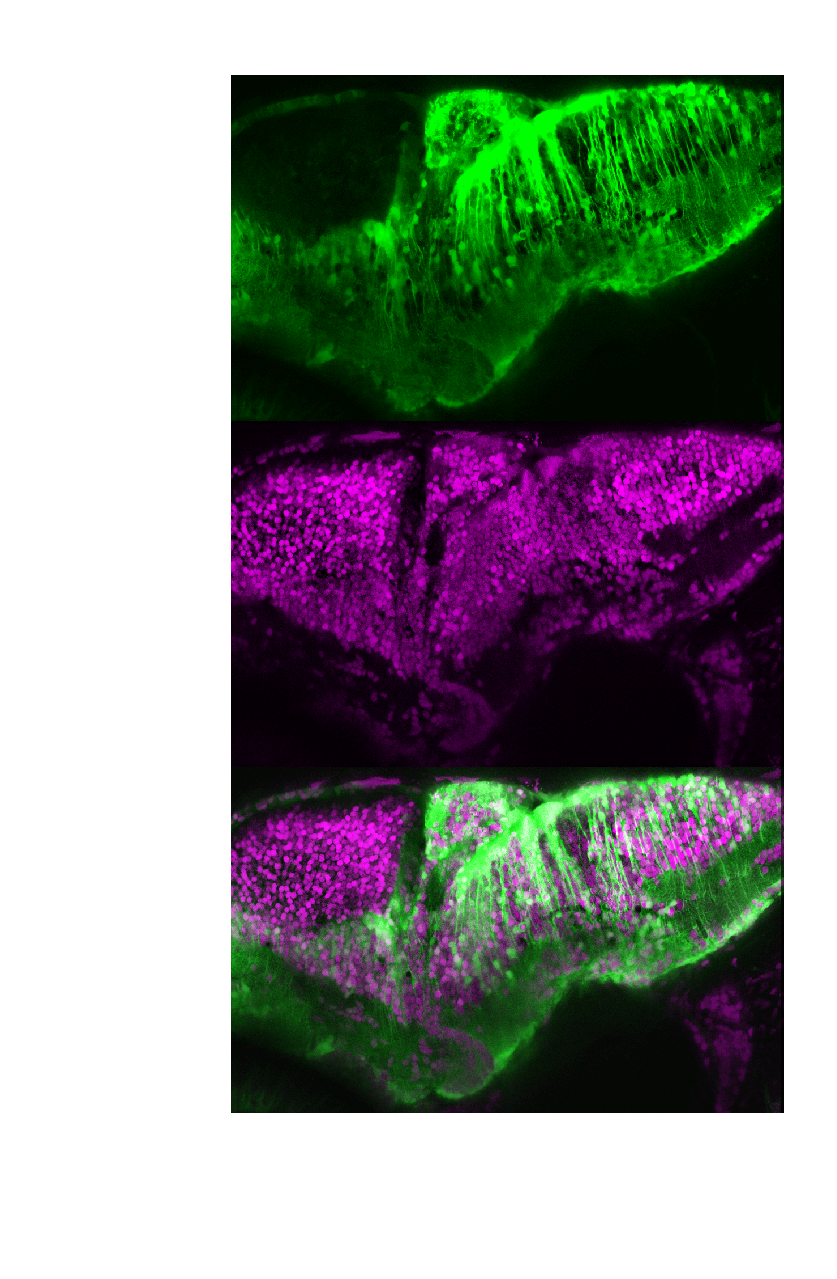

In [142]:
fig, axs = plt.subplots(dpi=500, nrows=3, figsize=(8.5 /4, 11/4))
z = (53, 57)
crop = (slice(*z), slice(32,-50), slice(8 * 36,900))
plane = rotate(side_im[crop[0]].max(0).astype('float32'), angle=2)[crop[1:]].transpose(1,0,-1)
g = gray2rgb(equalize_adapthist(rescale(plane[:,:,1], out_range=(0,1)), nbins=512)) * np.array([0,1,0])
n = gray2rgb(equalize_adapthist(rescale(plane[:,:,0], out_range=(0,1)), nbins=512)) * np.array([1,0,1])
gamma = (.8,1)
axs[0].imshow(rescale(g, out_range=(0, 1.5)).clip(0,1) ** gamma[0])
axs[1].imshow(n ** gamma[1])
axs[2].imshow(n ** gamma[1] + rescale(g, out_range=(0, 1.5)).clip(0,1) ** gamma[0])
[ax.axis('off') for ax in axs]
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('/groups/ahrens/ahrenslab/davis/data/ngm/{0}_z{1}-{2}.pdf'.format(exp_name, *z), dpi=1000)